## 讀取資料

In [1]:
import pandas
df = pandas.read_csv('data/20211109_top150_tw_stocks.csv')
df.set_index('Date', inplace=True)
df.head()

/Users/david/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,High,Low,Open,Close,Volume,Adj Close,symbol
Date,,,,,,,
2021-01-04,43.500000,43.049999,43.200001,43.200001,13705760.0,40.352589,1101
2021-01-05,43.400002,43.000000,43.250000,43.099998,16601334.0,40.259178,1101
2021-01-06,43.299999,42.799999,43.099998,42.950001,18966159.0,40.119068,1101
2021-01-07,43.150002,42.849998,42.950001,42.849998,21021508.0,40.025658,1101
2021-01-08,43.000000,42.799999,42.900002,42.950001,17371239.0,40.119068,1101


## 建立環境

In [2]:
from environment import ETFEnvironment
from agent import MinVarianceAgent, MaxSharpeAgent, MaxDecorrelationAgent, MaxReturnsAgent
from utils import *

/Volumes/Macintosh HD - Data/Users/davidchiu/project/Deep-Portfolio-Management/utils.py:13: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  current_cmap.set_bad(color='red')


In [7]:
N_ASSETS = 138 # 138 隻股票
WINDOW_FIT = 20 # 20 天週期
WINDOW_HOLD = 20 # 20 天週期
env = ETFEnvironment()

## 平均、最小變異數、最大 Sharp 值、最大低相關組合

In [18]:
agent_max_returns = MaxReturnsAgent(N_ASSETS, allow_short=True)
agent_minvar = MinVarianceAgent(N_ASSETS, allow_short=True)
agent_maxsharpe = MaxSharpeAgent(N_ASSETS, allow_short=True)
agent_maxdecorr = MaxDecorrelationAgent(N_ASSETS, allow_short=True)

In [19]:
actions_equal, actions_returns, actions_minvar, actions_maxsharpe, actions_maxdecorr = [], [], [], [], []
result_equal, result_returns, result_minvar, result_maxsharpe, result_maxdecorr = [], [], [], [], []

for i in range(WINDOW_FIT, len(env.data), WINDOW_HOLD):
    
    state = env.get_state(i, WINDOW_FIT, is_cov_matrix=False)
    
    action_equal = np.ones(N_ASSETS) / N_ASSETS
    action_minvar = agent_minvar.act(state)
    action_max_returns = agent_max_returns.act(state)
    action_maxsharpe = agent_maxsharpe.act(state)
    action_maxdecorr = agent_maxdecorr.act(state)
 
    state_action = env.get_state(i+WINDOW_HOLD, WINDOW_HOLD, is_cov_matrix=False)
    
    r = np.dot(state_action, action_equal)
    result_equal.append(r.tolist())
    actions_equal.append(action_equal)
    
    r = np.dot(state_action, action_minvar)
    result_minvar.append(r.tolist())
    actions_minvar.append(action_minvar)

    r = np.dot(state_action, action_max_returns)
    result_returns.append(r.tolist())
    actions_returns.append(action_max_returns)
    
    r = np.dot(state_action, action_maxsharpe)
    result_maxsharpe.append(r.tolist())
    actions_maxsharpe.append(action_maxsharpe)
    
    r = np.dot(state_action, action_maxdecorr)
    result_maxdecorr.append(r.tolist())
    actions_maxdecorr.append(action_maxdecorr)

In [20]:
result_equal_vis = [item for sublist in result_equal for item in sublist]
result_returns_vis = [item for sublist in result_returns for item in sublist]
result_minvar_vis = [item for sublist in result_minvar for item in sublist]
result_maxsharpe_vis = [item for sublist in result_maxsharpe for item in sublist]
result_maxdecorr_vis = [item for sublist in result_maxdecorr for item in sublist]

In [25]:
results = pandas.DataFrame({'equal':result_equal_vis, 
                  'returns': result_returns_vis,
                  'minvar': result_minvar_vis,
                  'maxsharpe': result_maxsharpe_vis,
                  'maxdecorr': result_maxdecorr_vis})
results.head()

,equal,returns,minvar,maxsharpe,maxdecorr
0,0.001805,0.002772,-0.000173,0.004131,0.001151
1,-0.002488,-0.008089,-0.000129,-0.003589,-0.000609
2,0.004718,0.004391,0.005305,-0.002884,-0.001187
3,0.021762,-0.006522,0.003176,-0.003750,0.001337
4,0.008143,-0.012906,0.004240,-0.003771,-0.000065


## 匯出運算結果

In [26]:
results.to_csv('data/markowitz_result.csv')

## 評估資產配置效果

In [31]:
import pandas
df = pandas.read_csv('data/markowitz_result.csv', index_col = 0)
df.head()

,equal,returns,minvar,maxsharpe,maxdecorr
0,0.001805,0.002772,-0.000173,0.004131,0.001151
1,-0.002488,-0.008089,-0.000129,-0.003589,-0.000609
2,0.004718,0.004391,0.005305,-0.002884,-0.001187
3,0.021762,-0.006522,0.003176,-0.003750,0.001337
4,0.008143,-0.012906,0.004240,-0.003771,-0.000065


<AxesSubplot:>

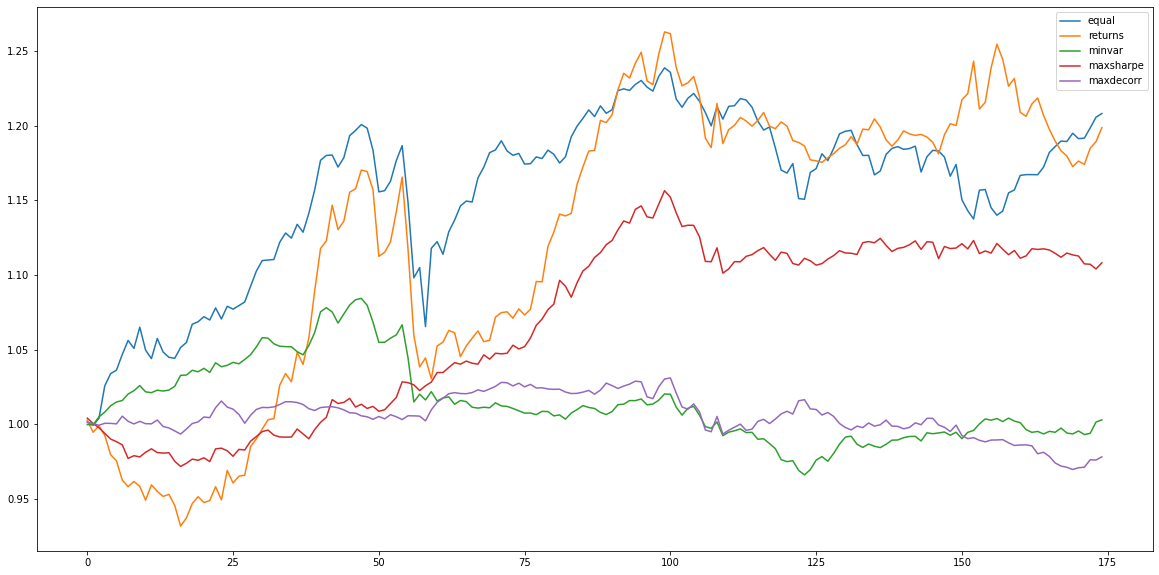

In [37]:
(df.cumsum() + 1).plot(kind = 'line', figsize = [20,10])